In this repository we are going to create a neuron that performs linear fit to a 2D model along with a simple regression problem based on using optimizers and cost function

In [1]:
# imports

import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)    # produce the same sequence of numbers every time
tf.set_random_seed(101)

In [3]:
# forming random data for feed

rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
# create placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = a+b

In [8]:
mul_op = a*b

In [11]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})  # feed dict helps to pass value to placeholders
    mul_result = sess.run(mul_op,feed_dict ={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [12]:
n_features = 10                  # no. of input features
n_dense_neurons = 3              # let us consider single layer with 3 neurons

In [13]:
# z = x*w +b    where x = features(placeholder)  w = weights(variable needs to be initalised)  b = bias(variable provided initally)

x = tf.placeholder(tf.float32,(None,n_features))

In [15]:
w = tf.Variable(tf.random_uniform([n_features,n_dense_neurons]))

In [16]:
b = tf.Variable(tf.ones(n_dense_neurons))       # for matrix multiplication and addition

In [17]:
xw =tf.matmul(x,w)

In [18]:
z = tf.add(xw,b)

In [19]:
# passing z to activation function f(z)

a = tf.sigmoid(z)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    
    sess.run(init)     # run init for the intializer
    layer_out = sess.run(a,feed_dict ={x:np.random.random([1,n_features])})

In [22]:
print(layer_out)

[[0.9933744  0.97591805 0.9951233 ]]


 problem with above example that we do not control the values of x and w


# Example for simple regression problem

In [24]:
# creating linearly spaced points between 0 and 10  along with some noise

x_data = np.linspace(0,10,10)  + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [25]:
y_label = np.linspace(0,10,10)  + np.random.uniform(-1.5,1.5,10)

In [26]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

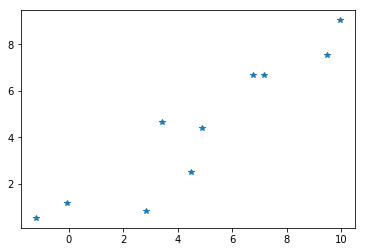

In [35]:
plt.plot(x_data,y_label,'*')

In [36]:
np.random.rand(2)            # just random values

array([0.44236813, 0.87758732])

In [37]:
# solving for y = mx +b

m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [38]:
error = 0    # cost function = ((actual value - predicted value)^2) /no. of values

for x,y in zip(x_data,y_label):
    
    y_hat = m*x +b                                        # predicted value
    error += (y-y_hat)**2

In [39]:
# Optimizer to reduce cost function or error

optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.001)
train = optimizer.minimize(error)            # optimizer is trying to minimise the cost function(error)

In [40]:
init = tf.global_variables_initializer()

In [41]:
with tf.Session() as sess:
    sess.run(init)
    training_steps =1
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])    

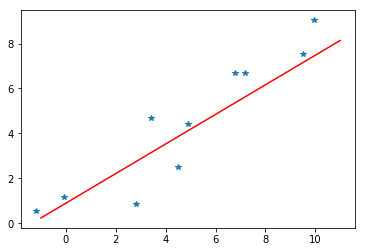

In [42]:
# testing

x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')